# Predição da velocidade de onda S por meio da regressão polinomial
# Campo norne


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/jadsomjose/data_well.git

Cloning into 'data_well'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 76 (delta 24), reused 54 (delta 14), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [ ]:
pip install lasio[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 263 kB 7.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [ ]:
# carregando dados
#alaska1 = lasio.read('data_well/dados_alaska/dado1.las').df()
#alaska2 = lasio.read('data_well/dados_alaska/dado2.las').df()
#alaska3 = lasio.read('data_well/dados_alaska/dado3.las').df()
#alaska4 = lasio.read('data_well/dados_alaska/dado4.las').df()
#alaska5 = lasio.read('data_well/dados_alaska/dado5.las').df()
#alaska6 = lasio.read('data_well/dados_alaska/dado6.las').df()
#alaska7 = lasio.read('data_well/dados_alaska/dado7.las').df()
#alaska8 = lasio.read('data_well/dados_alaska/dado8.las').df()
#alaska9 = lasio.read('data_well/dados_alaska/dado9.las').df()
norne1 = lasio.read('data_well/dado_norne/660810-B-4AH.las').df() # complete 
norne2 = lasio.read('data_well/dado_norne/660810-C-1H.las').df() # complete
#norne3 = lasio.read('data_well/dado_norne/660810-C-2H.las').df() # não apresenta RHOB
norne4 = lasio.read('data_well/dado_norne/660810-C-3H.las').df() # complete
norne5 = lasio.read('data_well/dado_norne/660810-C-4AH.las').df() # complete 
norne6 = lasio.read('data_well/dado_norne/660810-D-4H.las').df() # complete
norne7 = lasio.read('data_well/dado_norne/660810-E-3H.las').df() # complete 

In [ ]:
norne1 = norne1.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne2 = norne2.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
#norne3 = norne3.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne4 = norne4.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne5 = norne5.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne6 = norne6.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne7 = norne7.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])

In [ ]:
# Base de dados para o calculo do Vs e Vp para norne1
VSH1 = norne1.loc[:, ['VSH']]
NPHI1 = norne1.loc[:, ['NPHI']]
RHOB1 = norne1.loc[:, ['RHOB']]
DTS1 = norne1.loc[:, ['DTS']]
DT1 = norne1.loc[:, ['DT']]

Calculando VP e VS

$V_P=10^3 \frac{0.3048}{\Delta t_P}$ --> km/s


In [ ]:
# Calculo do VS E VP para norne 1
norne1['VP'] = (0.3048/norne1['DT'])*10**3 #VP
norne1['VS'] = (0.3048/norne1['DTS'])*10**3 #VP
vp1=norne1['VP']
vs1=norne1['VS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
norne1.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 2
norne2['VP'] = (0.3048/norne2['DT'])*10**3 #VP
norne2['VS'] = (0.3048/norne2['DTS'])*10**3 #VP
vp2=norne1['VP']
vs2=norne1['VS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
norne2.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 4
norne4['VP'] = (0.3048/norne4['DT'])*10**3 #VP
norne4['VS'] = (0.3048/norne4['DTS'])*10**3 #VP
vp4=norne4['VP']
vs4=norne4['VS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
norne4.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 5
norne5['VP'] = (0.3048/norne5['DT'])*10**3 #VP
norne5['VS'] = (0.3048/norne5['DTS'])*10**3 #VP
vp5=norne5['VP']
vs5=norne5['VS']

In [ ]:
norne5.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 6
norne6['VP'] = (0.3048/norne6['DT'])*10**3 #VP
norne6['VS'] = (0.3048/norne6['DTS'])*10**3 #VP
vp6=norne6['VP']
vs6=norne6['VS']

In [ ]:
norne6.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
# Calculo do VS E VP para norne 7
norne7['VP'] = (0.3048/norne7['DT'])*10**3 #VP
norne7['VS'] = (0.3048/norne7['DTS'])*10**3 #VP
vp7=norne7['VP']
vs7=norne7['VS']

In [ ]:
norne7.columns

Index(['TVD', 'TVDSS', 'DT', 'DTS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB',
       'SW', 'VSH', 'VP', 'VS'],
      dtype='object')

In [ ]:
X1 = norne1.loc[:, ['VP']]
X2 = norne2.loc[:, ['VP']]
X4 = norne4.loc[:, ['VP']]
X5 = norne5.loc[:, ['VP']] #Blind well
X6 = norne6.loc[:, ['VP']]
X7 = norne7.loc[:, ['VP']]



y1 = norne1.loc[:, ['VS']]
y2 = norne2.loc[:, ['VS']]
y4 = norne4.loc[:, ['VS']]
y5 = norne5.loc[:, ['VS']] #Blind well
y6 = norne6.loc[:, ['VS']]
y7 = norne7.loc[:, ['VS']]


depth5= norne5.index

##Separação dos dados de teste e treinamento campo norne

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3) # test_size igual a 0.3 pega 30% do poço 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) # 1 linha pra cada poço
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3)

##Concatenação dos dados de referência campo norne

In [ ]:
X_ref_train = np.concatenate((X7_train, X1_train,X4_train), axis = 0) # junta os 30% de cada poço para o treinamento de features
X_ref_test = np.concatenate((X7_test, X1_test,X4_test), axis = 0) # junta os 70% de cada poço para teste de features

y_ref_train = np.concatenate((y7_train, y1_train,y4_train), axis = 0) # junta os 30% de cada poço para o treinamento de target
y_ref_test = np.concatenate((y7_test, y1_test,y4_test), axis = 0) # junta os 70 % de cada poço para o treinamento de target 

##Escalonamento dos dados campo norne:Standard Scaler 

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalery = StandardScaler()
X_ref_train_sclnd = scalerX.fit_transform(X_ref_train)
X_ref_test_sclnd = scalerX.transform(X_ref_test)
X_blind_sclnd = scalerX.transform(X5) # Poço para validação

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X_ref_train_sclnd = np.array(X_ref_train_sclnd).reshape(-1,)
y_ref_train = np.array(y_ref_train).reshape(-1,)

In [ ]:
#Regressão polinomial
# Número de modelos polinomiais 

NUM_MODELS = 2

# Regressão polinomial
for k in range(0, NUM_MODELS):

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(X_ref_train_sclnd, y_ref_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_blind_pred_poly = np.polyval(fit_coeff, X_blind_sclnd)
  y_test_pred_poly = np.polyval(fit_coeff, X_ref_test_sclnd)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# Poço cego (blind)
#Erro absoluto percentual médio
mape_poly_blind = mean_absolute_percentage_error(y5, y_blind_pred_poly)
#O erro quadrático médio para o Poço cego da regressão é
mse_poly_blind = mean_squared_error(y5, y_blind_pred_poly, squared= True)
#Correlação entre o predito e o real
r_poly_correlation_blind_pred = pd.DataFrame(np.concatenate((np.array(y5), y_blind_pred_poly),axis=1)).corr().iloc[0,1]
#O erro quadrático médio para o Poço cego da regressão é
rmse_poly_blind = mean_squared_error(y5, y_blind_pred_poly, squared= False)
#Erro absoluto médio
mae_poly_blind = mean_absolute_error(y5, y_blind_pred_poly)

# Poço teste
#Erro absoluto percentual médio
mape_poly_teste = mean_absolute_percentage_error(y_ref_test, y_test_pred_poly)
#O erro quadrático médio para o Poço teste da regressão é
mse_poly_teste = mean_squared_error(y_ref_test, y_test_pred_poly, squared= True)
#Correlação entre o teste predito e o teste real
r_poly_correlation_teste_pred = pd.DataFrame(np.concatenate((np.array(y_ref_test), y_test_pred_poly),axis=1)).corr().iloc[0,1]
#O erro quadrático médio para o Poço teste da regressão é
rmse_poly_teste = mean_squared_error(y_ref_test, y_test_pred_poly, squared= True)
#Erro absoluto médio
mae_poly_teste = mean_absolute_error(y_ref_test, y_test_pred_poly)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas','poly regression Poço cego','poly regression Poço teste'],
                                         align=['center','center'],
                                         font=dict(size=12)),
                cells=dict(values=[['MAPE','MSE','Correlação pearson', 'RMSE', 'MAE'],
                ["{:.5f}".format(mape_poly_blind),"{:.5f}".format(mse_poly_blind),"{:.5f}".format(r_poly_correlation_blind_pred),"{:.5f}".format(rmse_poly_blind),"{:.5f}".format(mae_poly_blind)],
                ["{:.5f}".format(mape_poly_teste),"{:.5f}".format(mse_poly_teste),"{:.5f}".format(r_poly_correlation_teste_pred), "{:.5f}".format(rmse_poly_teste),"{:.5f}".format(mae_poly_teste)]],)),])

fig.show()

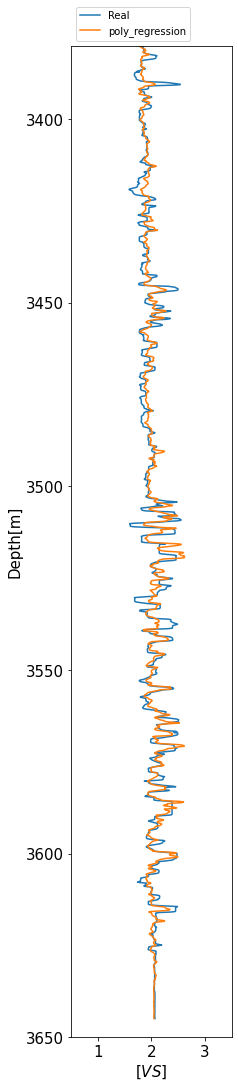

In [ ]:
##predito x real
# Plot real x predito modelo 1
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure(figsize=(15,15), constrained_layout=True)
#plt.title('Modelo 1: real x predito - Regressões', fontsize=16)
ax1 = f.add_subplot(161) # 1= linha, 3 coluna e 1 coluna
ax1.plot(np.array(y5), np.array(depth5), label='Real')
ax1.plot(y_blind_pred_poly, np.array(depth5), label='poly_regression')
plt.legend(bbox_to_anchor=(0.001, 1, 1, 0.001))
#plt.legend(loc='lower right')
plt.xlim(0.5,3.5)
plt.ylim(3380,3650)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('[$VS$]', size=15)
plt.tick_params(axis='y', labelsize=15)

# Predição da velocidade de onda S por meio da regressão polinomial
# Campo cambo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/jadsomjose/data_well.git

fatal: destination path 'data_well' already exists and is not an empty directory.


In [ ]:
pip install lasio[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [ ]:
# carregando dados
cambo_1 = lasio.read('data_well/dado_cambo/204_05a-1_DATACO_JWDL_QC.las').df()
#cambo_2 = lasio.read('data_well/dado_cambo/204_10-1_DATACO_JWDL_QC.las').df() não apresenta DTS
cambo_3 = lasio.read('data_well/dado_cambo/204_10a-3_DATACO_JWDL_QC.las').df()
cambo_4 = lasio.read('data_well/dado_cambo/204_10a-4_DATACO_JWDL_QC.las').df()


In [ ]:
cambo_1 = cambo_1.dropna(subset=['DTC', 'NEUT', 'DTS','DENS', 'GR_WL'])
#cambo_2 = cambo_2.dropna(subset=['DT', 'NEUT', 'DTS','DENS', 'GR']) # não apresenta DTS
cambo_3 = cambo_3.dropna(subset=['DTC', 'NEUT', 'DTS','DENS', 'GR'])
cambo_4 = cambo_4.dropna(subset=['DTC', 'NEUT', 'DTS','DENS', 'GR'])


In [ ]:
cambo_1.reset_index()

,DEPTH,CALI_LWD,CALI_WL,DENC,DENS,DTC,DTS,GR_LWD,GR_WL,NEUT,...,RDEP,RLA1,RLA2,RLA3,RLA4,RLA5,RPCHM,RPCLM,RT_HRLT,RXO_HRLT
0,7575.0,12.3345,18.5563,-0.0035,1.4405,101.9942,243.8885,57.7570,146.6177,0.7616,...,1.2538,1.3809,2.2560,3.1539,3.1760,2.7421,1.2355,1.2611,3.7069,1.2883
1,7575.5,12.3385,18.5615,-0.0099,1.4276,105.0495,186.6996,54.6236,155.0675,0.7523,...,1.2675,1.2667,1.9609,2.6655,2.8028,2.4259,1.2573,1.2696,3.3276,1.0100
2,7576.0,12.3218,18.5614,-0.0129,1.4171,105.4965,180.4277,58.5673,167.1443,0.6967,...,1.2862,1.1447,1.7311,2.3057,2.4679,2.1326,1.2421,1.2850,2.9276,0.8443
3,7576.5,12.3483,18.5540,-0.0154,1.4055,107.3368,193.4068,63.8640,176.4647,0.6864,...,1.2886,1.0218,1.5734,2.0834,2.2507,1.9493,1.2747,1.2913,2.6892,0.7148
4,7577.0,12.5023,18.5636,-0.0182,1.3943,114.3873,212.1082,68.6352,183.1882,0.7194,...,1.3122,0.9371,1.4561,1.9211,2.0838,1.8250,1.2331,1.3122,2.5248,0.6169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,9032.0,12.0143,12.2464,0.0548,2.4929,106.0688,212.8256,60.3250,101.5125,0.3960,...,1.6220,1.9986,2.4163,2.5728,2.6290,2.5598,1.7315,1.6427,3.0359,1.2068
2883,9032.5,12.0183,12.2053,0.0563,2.4969,106.8163,213.6967,56.4987,99.2651,0.4124,...,1.6187,1.9420,2.3169,2.4934,2.5307,2.5015,1.7082,1.6234,2.9661,1.2185
2884,9033.0,12.0261,12.2022,0.0550,2.4938,107.4993,215.5808,52.5641,98.4752,0.4321,...,1.5954,2.2848,2.5170,2.6899,2.6888,2.6242,1.6727,1.5982,2.9456,1.6731
2885,9033.5,12.0326,12.2121,0.0501,2.4749,108.2034,219.3385,51.7022,100.5677,0.4434,...,1.5843,2.1123,2.3627,2.5118,2.5091,2.4549,1.6603,1.5801,2.7664,1.6032


In [ ]:
cambo_3.reset_index()

,DEPTH,A16H,A22H,A28H,A34H,A40H,CALI,DENC,DENS,DTC,...,P34H,P40H,PEF,RDEP,RLA2,RLA4,RMED,RMIC,RSHAL,SP
0,7550.0,NaN,NaN,NaN,NaN,NaN,8.8154,0.0110,2.2846,124.3510,...,NaN,NaN,4.2160,1.4911,1.9325,1.6199,1.7312,NaN,1.9021,112.1350
1,7550.5,NaN,NaN,NaN,NaN,NaN,8.8541,-0.0010,2.2904,122.9690,...,NaN,NaN,4.4159,1.4096,1.7586,1.5535,1.7156,NaN,1.7201,109.5100
2,7551.0,NaN,NaN,NaN,NaN,NaN,8.8667,-0.0025,2.2540,122.3419,...,NaN,NaN,4.3743,1.3509,1.6768,1.5237,1.6775,NaN,1.6457,106.8225
3,7551.5,NaN,NaN,NaN,NaN,NaN,8.8133,-0.0016,2.2868,121.3799,...,NaN,NaN,4.3493,1.6535,1.9970,1.8589,2.0335,NaN,1.9497,99.8850
4,7552.0,1.3275,1.3206,1.3169,1.3171,1.3183,8.7238,-0.0005,2.2567,120.5432,...,1.2605,1.2601,4.4092,1.7338,2.0246,1.9475,2.0828,NaN,1.9868,96.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,9148.0,2.7535,2.6995,2.6778,2.6822,2.6892,8.5406,-0.0014,2.4955,104.2277,...,2.5457,2.5389,3.1095,3.3376,3.4173,3.3414,3.3993,3.8152,3.4585,116.9475
3197,9148.5,2.7321,2.6890,2.6635,2.6574,2.6588,8.5222,-0.0048,2.4784,104.3981,...,2.5423,2.5351,3.3219,3.3689,3.4533,3.3658,3.4314,3.7706,3.4821,122.8850
3198,9149.0,2.7198,2.6842,2.6703,2.6792,2.6940,8.5325,-0.0076,2.4648,104.3717,...,2.4711,2.4568,3.2511,3.3433,3.4263,3.3382,3.4002,3.6602,3.4403,118.5725
3199,9149.5,2.7199,2.6805,2.6627,2.6685,2.6818,8.5369,-0.0100,2.4454,103.6262,...,2.4326,2.4197,3.2924,3.3768,3.4527,3.3698,3.4325,3.5597,3.4465,115.8850


In [ ]:
# Base de dados para o calculo do Vs e Vp para norne1
#VSH1 = norne1.loc[:, ['VSH']]
#NPHI1 = norne1.loc[:, ['NPHI']]
#RHOB1 = norne1.loc[:, ['RHOB']]
#DTS1 = norne1.loc[:, ['DTS']]
#DT1 = norne1.loc[:, ['DT']]

In [ ]:
cambo_4.reset_index()

,DEPTH,CALI,DENC,DENS,DTC,DTS,GR,NEUT,PEF,RACHM,RACLM,RDEP,RLA2,RLA4,RMED,RMIC,RPCHM,RPCLM,RSHAL,SP
0,7566.0,16.8794,0.0519,2.2316,123.0128,278.9178,82.4459,0.7393,5.9887,1.0515,1.0653,1.1721,1.1050,1.2201,1.2354,NaN,1.0910,1.0714,0.7733,57.9480
1,7566.5,17.0103,0.0249,2.1701,125.1202,278.2628,83.1519,0.5943,5.8339,1.0612,1.0665,1.2057,1.2180,1.3133,1.3729,NaN,1.0906,1.0775,0.8510,58.1355
2,7567.0,16.8163,0.0090,2.1776,125.5746,280.2031,83.3492,0.6439,6.0780,1.0612,1.0705,1.2224,1.2400,1.3441,1.4150,NaN,1.0455,1.0628,0.8655,58.1980
3,7567.5,16.9566,0.0068,2.1517,126.8035,283.5175,84.9550,0.6689,5.6565,1.0466,1.0749,1.2725,1.2875,1.4151,1.4889,NaN,1.0168,1.0495,0.8911,58.1355
4,7568.0,17.0015,0.0009,2.1785,127.0351,292.2746,84.3690,0.7125,5.1703,1.0436,1.0795,1.3113,1.3148,1.4715,1.5283,NaN,1.0354,1.0505,0.9237,58.1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,8903.0,12.7913,0.0009,2.4648,104.6526,217.6511,101.5306,0.3170,3.2192,2.0985,2.2552,3.2021,3.6527,3.5751,3.7399,3.5408,2.2132,2.1616,3.1880,72.7605
2675,8903.5,12.8014,0.0052,2.4717,104.3472,216.7653,106.8925,0.3243,3.1905,2.1142,2.2705,3.2452,3.7054,3.6208,3.7928,3.6317,2.1488,2.1379,3.2609,69.4480
2676,8904.0,12.7980,0.0128,2.4620,104.0706,217.5949,105.9781,0.3156,3.2474,2.1086,2.2729,3.1995,3.6832,3.5730,3.7474,3.9595,2.1258,2.1257,3.2904,67.8855
2677,8904.5,12.7886,0.0129,2.4491,104.0851,216.5096,106.5735,0.3127,3.3077,2.0996,2.2787,3.1586,3.5968,3.4922,3.6925,3.5554,2.1367,2.1287,3.1620,68.5730


Calculando VP e VS

$V_P=10^3 \frac{0.3048}{\Delta t_P}$ --> km/s


In [ ]:
# Calculo do VS E VP para cambo_1
cambo_1['VP'] = (0.3048/cambo_1['DTC'])*10**3 #VP
cambo_1['VS'] = (0.3048/cambo_1['DTS'])*10**3 #VP

In [ ]:
# Calculo do VS E VP para cambo_3
cambo_3['VP'] = (0.3048/cambo_3['DTC'])*10**3 #VP
cambo_3['VS'] = (0.3048/cambo_3['DTS'])*10**3 #VP

In [ ]:
# Calculo do VS E VP para cambo_4
cambo_4['VP'] = (0.3048/cambo_4['DTC'])*10**3 #VP
cambo_4['VS'] = (0.3048/cambo_4['DTS'])*10**3 #VP

In [ ]:
#Modelo para a regressão polinomial campo cambo
X8 = cambo_1.loc[:, ['VP']]
X9 = cambo_3.loc[:, ['VP']]
X10 = cambo_4.loc[:, ['VP']]


y8 = cambo_1.loc[:, ['VS']]
y9 = cambo_3.loc[:, ['VS']]
y10 = cambo_4.loc[:, ['VS']]

depth9= cambo_3.index

##Separação dos dados de teste e treinamento campo norne

In [ ]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3) # test_size igual a 0.3 pega 30% do poço 1
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3) # 1 linha pra cada poço

##Concatenação dos dados de referência campo norne

In [ ]:
X_ref_train_cambo = np.concatenate((X8_train, X10_train), axis = 0) # junta os 30% de cada poço para o treinamento de features
X_ref_test_cambo = np.concatenate((X8_test, X10_test), axis = 0) # junta os 70% de cada poço para teste de features

y_ref_train_cambo = np.concatenate((y8_train, y10_train), axis = 0) # junta os 30% de cada poço para o treinamento de target
y_ref_test_cambo = np.concatenate((y8_test, y10_test), axis = 0) # junta os 70 % de cada poço para o treinamento de target 

##Escalonamento dos dados campo norne:Standard Scaler 

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalery = StandardScaler()
X_ref_train_sclnd_cambo = scalerX.fit_transform(X_ref_train_cambo)
X_ref_test_sclnd_cambo = scalerX.transform(X_ref_test_cambo)
X_blind_sclnd_cambo = scalerX.transform(X9) # Poço para validação

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [ ]:
X_ref_train_sclnd_cambo = np.array(X_ref_train_sclnd_cambo).reshape(-1,)
y_ref_train_cambo = np.array(y_ref_train_cambo).reshape(-1,)

In [ ]:
#Regressão polinomial
# Número de modelos polinomiais 

NUM_MODELS = 14

# Regressão polinomial
for k in range(0, NUM_MODELS):

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(X_ref_train_sclnd_cambo, y_ref_train_cambo, deg = k+1)

  # train and test k-th degree polynomial fit
  y_blind_pred_poly_cambo = np.polyval(fit_coeff, X_blind_sclnd_cambo)
  y_test_pred_poly_cambo = np.polyval(fit_coeff, X_ref_test_sclnd_cambo)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# Poço cego (blind)
#Erro absoluto percentual médio
mape_poly_blind_cambo = mean_absolute_percentage_error(y9, y_blind_pred_poly_cambo)
#O erro quadrático médio para o Poço cego da regressão é
mse_poly_blind_cambo = mean_squared_error(y9, y_blind_pred_poly_cambo, squared= True)
#Correlação entre o predito e o real
r_poly_correlation_blind_pred_cambo = pd.DataFrame(np.concatenate((np.array(y9), y_blind_pred_poly_cambo),axis=1)).corr().iloc[0,1]
#O erro quadrático médio para o Poço cego da regressão é
rmse_poly_blind_cambo = mean_squared_error(y9, y_blind_pred_poly_cambo, squared= False)
#Erro absoluto médio
mae_poly_blind_cambo = mean_absolute_error(y9, y_blind_pred_poly_cambo)

# Poço teste
#Erro absoluto percentual médio
mape_poly_teste_cambo = mean_absolute_percentage_error(y_ref_test_cambo, y_test_pred_poly_cambo)
#O erro quadrático médio para o Poço teste da regressão é
mse_poly_teste_cambo = mean_squared_error(y_ref_test_cambo, y_test_pred_poly_cambo, squared= True)
#Correlação entre o teste predito e o teste real
r_poly_correlation_teste_pred_cambo = pd.DataFrame(np.concatenate((np.array(y_ref_test_cambo), y_test_pred_poly_cambo),axis=1)).corr().iloc[0,1]
#O erro quadrático médio para o Poço teste da regressão é
rmse_poly_teste_cambo = mean_squared_error(y_ref_test_cambo, y_test_pred_poly_cambo, squared= True)
#Erro absoluto médio
mae_poly_teste_cambo = mean_absolute_error(y_ref_test_cambo, y_test_pred_poly_cambo)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Métricas','poly regression dado cego','poly regression dado teste'],
                                         align=['center','center'],
                                         font=dict(size=12)),
                cells=dict(values=[['MAPE','MSE','Correlação pearson', 'RMSE', 'MAE'],
                ["{:.5f}".format(mape_poly_blind_cambo),"{:.5f}".format(mse_poly_blind_cambo),"{:.5f}".format(r_poly_correlation_blind_pred_cambo),"{:.5f}".format(rmse_poly_blind_cambo),"{:.5f}".format(mae_poly_blind_cambo)],
                ["{:.5f}".format(mape_poly_teste_cambo),"{:.5f}".format(mse_poly_teste_cambo),"{:.5f}".format(r_poly_correlation_teste_pred_cambo), "{:.5f}".format(rmse_poly_teste_cambo),"{:.5f}".format(mae_poly_teste_cambo)]],)),])

fig.show()

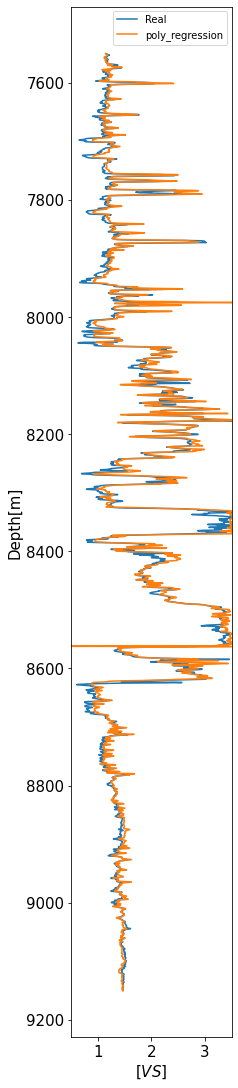

In [ ]:
##predito x real
# Plot real x predito modelo 1
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure(figsize=(15,15), constrained_layout=True)
#plt.title('Modelo 1: real x predito - Regressões', fontsize=16)
ax1 = f.add_subplot(161) # 1= linha, 3 coluna e 1 coluna
ax1.plot(np.array(y9), np.array(depth9), label='Real')
ax1.plot(y_blind_pred_poly_cambo, np.array(depth9), label='poly_regression')
plt.legend(bbox_to_anchor=(0.001, 1, 1, 0.001))
#plt.legend(loc='lower right')
plt.xlim(0.5,3.5)
#plt.ylim(3380,3650)
plt.tick_params(axis='x', labelsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('[$VS$]', size=15)
plt.tick_params(axis='y', labelsize=15)